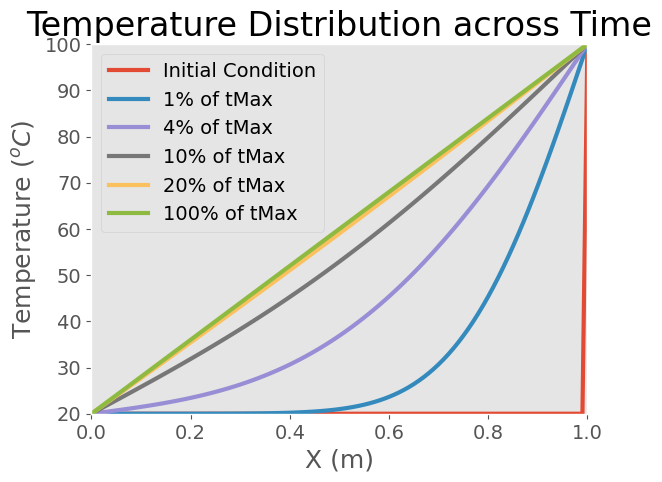

In [1]:
# Script to compute the numerical solution of the 1D Heat Equation

import numpy as np
import math
import matplotlib
from matplotlib import pyplot as mplot
mplot.style.use("ggplot")

def solveHeatEquation(deltaT,numX,alpha,tMax,temp1,temp2,scheme):

    deltaX = 1.0/(numX-1)

    # Compute the stability-related constant
    C = alpha*deltaT/(deltaX*deltaX)

    # Mesh and initial condition
    x = np.linspace(0,1,numX)
    y = temp1*np.ones(x.shape)

    # Fix the hot boundary condition
    y[-1] = temp2
    mplot.plot(x,y,'-', label='Initial Condition',linewidth=3)

    time = 0
    count = 0
    numTimeSteps = (np.rint(tMax/deltaT)).astype(int)
    pausePercentages = np.array([1,4,10,20,100])

    pauseTimeSteps = np.rint(numTimeSteps*0.01*pausePercentages).astype(int)

    triDiag = []
    if scheme == 'implicit':
        triDiag = np.empty(shape=(numX-2,numX-2))
        triDiag.fill(0)
        for k in range(0,numX-2):
            triDiag[k][k] = 1+2*C
            if k+1 <= numX-3:
                triDiag[k][k+1] = -C
            if k-1 >= 0:
                triDiag[k][k-1] = -C
        rhs = np.zeros(shape=(numX-2,1))
    
    while time < tMax:
        
         if scheme == 'explicit':
            yold = np.copy(y)
            y[1:-1] = yold[1:-1] + C*(yold[2:]-2*yold[1:-1]+yold[0:-2])
         else:
            yold = np.copy(y)
            rhs = yold[1:-1]
            rhs[0] = rhs[0]+C*yold[0]
            rhs[-1] = rhs[-1]+C*yold[-1]
            y[1:-1] = (np.linalg.inv(triDiag).dot(np.array([rhs]).T)).T

         time = time + deltaT
         count = count + 1
         if count in pauseTimeSteps:
             index = np.where(pauseTimeSteps == count)
             mplot.plot(x,y,'-', label='%s%% of tMax' %pausePercentages[index][0],linewidth=3)
            
    mplot.title('Temperature Distribution across Time', fontsize=24)
    mplot.xlim(0,1)
    mplot.xticks(fontsize=14)
    mplot.ylim(temp1,temp2)
    mplot.yticks(fontsize=14)
    mplot.grid()
    mplot.ylabel('Temperature ($^{o}C$)', fontsize=18, loc='center',rotation=90)
    mplot.xlabel('X (m)', fontsize=18)
    mplot.legend(prop={'size': 14})
    mplot.show(block=True)


if __name__ == '__main__':

    numX = 101
    tMax = 10
    alpha = 0.2 #Plexiglass

    # Boundary Conditions
    temp1 = 20
    temp2 = 100

    # Implicit Scheme Settings
    deltaT = 0.0001
    scheme = 'implicit'

    # Explicit Scheme Settings    
#    deltaT = 0.00024
#    scheme = 'explicit'
    solveHeatEquation(deltaT,numX,alpha,tMax,temp1,temp2,scheme)